<a href="https://colab.research.google.com/github/isra9731/TSF_Tasks/blob/main/TASK_2_Prediction_using_Unsupervised_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SPARKS FOUNDATION INTERNSHIP GRIP JULY 2021**
##**DATA SCIENCE AND BUSINESS ANALYTICS**

###**AUTHOR : ISRA FARDEEN**

**Date : 10-07-2021**


###**K-Means Clustering**


K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

###***Prediction using Unsupervised***

####**Task**

From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually

**Dataset used : https://bit.ly/3kXTdox**

In [79]:
#importing libraries required in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [80]:
#Loading and Reading the Iris dataset
data=pd.read_csv('/content/Iris.csv')  #using the read_csv Pandas method and storing the data in a data frame df
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Displaying the first 10 records using **head()** method

In [81]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Displaying the last 10 records using **tail()** method

In [82]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Using shape to check how many rows and columns are there in the dataset

In [83]:
data.shape

(150, 6)

checking for NAN values

In [84]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Checking statistical description

In [85]:
print(data.describe().T)

               count       mean        std  min    25%    50%     75%    max
Id             150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
SepalLengthCm  150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
SepalWidthCm   150.0   3.054000   0.433594  2.0   2.80   3.00    3.30    4.4
PetalLengthCm  150.0   3.758667   1.764420  1.0   1.60   4.35    5.10    6.9
PetalWidthCm   150.0   1.198667   0.763161  0.1   0.30   1.30    1.80    2.5


Checking for distinct class labels in iris dataset

In [86]:
print(data.Species.unique())
print(data.Species.nunique())
#counts of unique values
print(data.Species.value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


###**Data Visualization**

Checking Outliers in each of the features

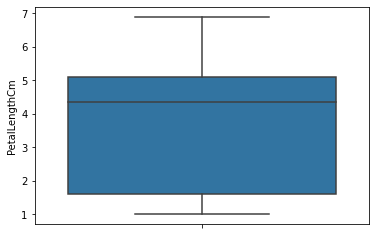

In [87]:
sns.boxplot(y=data['PetalLengthCm'])
plt.show()

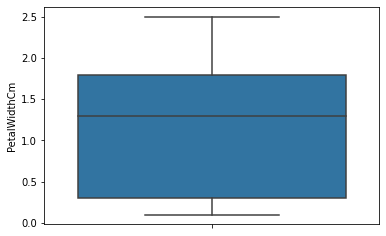

In [88]:
sns.boxplot(y=data['PetalWidthCm'])
plt.show()

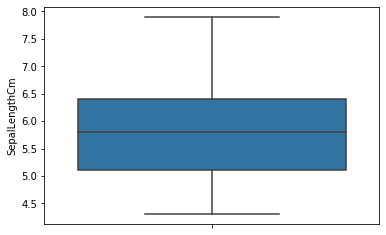

In [89]:
sns.boxplot(y=data['SepalLengthCm'])
plt.show()

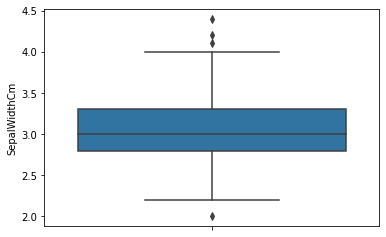

In [90]:
sns.boxplot(y=data['SepalWidthCm'])
plt.show()

From the above box plot we notice that SepalWidthCm has outliers

In [91]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
data = data[(data['SepalWidthCm'] >= q1-1.5*iqr) & (data['SepalWidthCm'] <= q3+1.5*iqr)]
data.shape # To find out the number of rows and column after outlier treatment

(146, 6)

We see that after outlier treatment the number of rows are reduced to 146 out of 150

Boxplot of SepalWidthCm after Outlier treatment

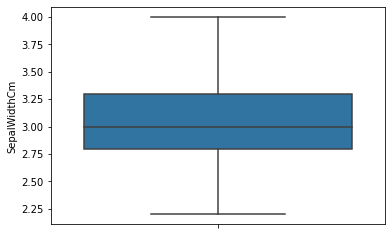

In [92]:
sns.boxplot(y=data['SepalWidthCm'])
plt.show()

Box plot for Petal Length vs Species

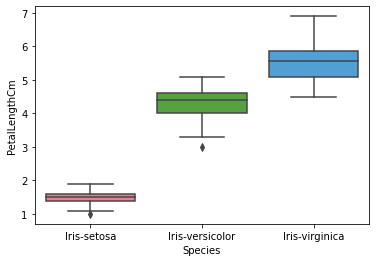

In [93]:
sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=data)

Box plot for Petal Width vs Species

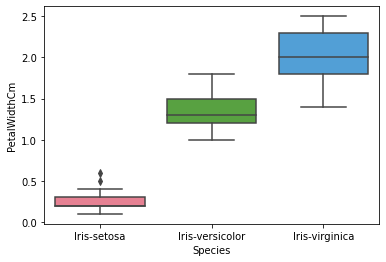

In [94]:
sns.boxplot(x="Species", y="PetalWidthCm", palette="husl", data=data)

Box plot for Sepal Length vs Species

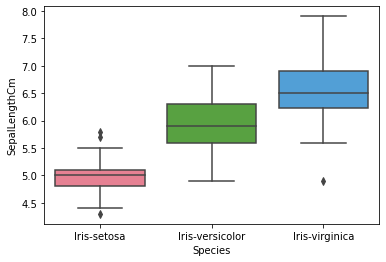

In [95]:
sns.boxplot(x="Species", y="SepalLengthCm", palette="husl", data=data)

Box plot for Sepal Width vs Species

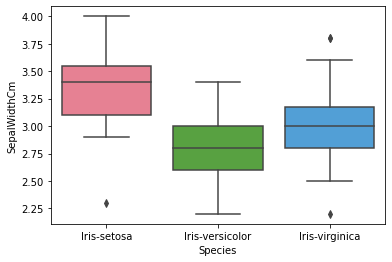

In [96]:
sns.boxplot(x="Species", y="SepalWidthCm", palette="husl", data=data)

 selecting all four features **(sepal length, sepal width, petal length, and petal width)** of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the four columns 

In [97]:
x = data.iloc[:, [0,1,2,3]].values

Let’s assign the value of k as 5. We will implement k-means clustering using k=5. For this we will instantiate the KMeans class and assign it to the variable kmeans:

In [98]:
kmeans=KMeans(n_clusters=5)

y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Finding the centers of 5 clusters formed from the data:

**Implementing K-means with k = 5**

In [99]:
kmeans.cluster_centers_

array([[106.        ,   6.27931034,   2.86551724,   5.13793103],
       [ 46.92592593,   5.37037037,   3.13703704,   2.52592593],
       [ 16.        ,   4.99666667,   3.40666667,   1.47666667],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333],
       [ 76.5       ,   5.99666667,   2.77      ,   4.33      ]])

In order to find the optimal number of clusters in a dataset we use **ELBOW METHOD** Using this method we can calculate the optimum value of k.
We will plot a graph between the number of clusters and the corresponding error value.

In [100]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 274358.7138356164
k: 2 wcss: 69517.54487511737
k: 3 wcss: 30939.32911060076
k: 4 wcss: 17267.852497736974
k: 5 wcss: 10874.047623973727
k: 6 wcss: 7831.949083333333
k: 7 wcss: 5774.269380268854
k: 8 wcss: 4390.468153834341
k: 9 wcss: 3363.4145379318393
k: 10 wcss: 2737.4080819597066


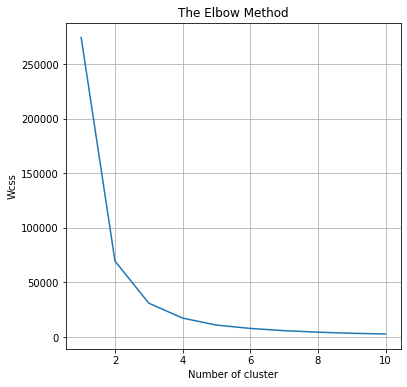

In [101]:
#plotting the results on a line graph
plt.figure(figsize = (6,6))
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Wcss")
plt.grid(True)
plt.show()

The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

**Implementing K-means with k = 3**

In [102]:
kmeans=KMeans(n_clusters=3)

y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [103]:
kmeans.cluster_centers_

array([[125.5       ,   6.588     ,   2.974     ,   5.552     ],
       [ 75.79591837,   5.95510204,   2.78571429,   4.2755102 ],
       [ 25.36170213,   4.97659574,   3.36595745,   1.46382979]])

###**Visualizing Clusters**

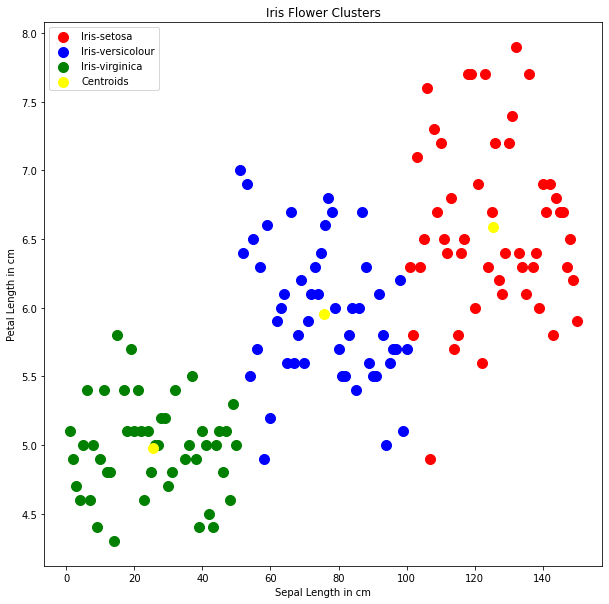

In [104]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()